# 1) Chuẩn bị dữ liệu

In [ ]:
!gdown 1MGhyeMngD6P9Kz9zJpL68ylQaIQvW7Zx
!unzip GTZAN.zip -d /content/GTZAN
!rm GTZAN.zip

Downloading...
From: https://drive.google.com/uc?id=1MGhyeMngD6P9Kz9zJpL68ylQaIQvW7Zx
To: /content/GTZAN.zip
100% 1.30G/1.30G [00:17<00:00, 73.6MB/s]
Archive:  GTZAN.zip
  inflating: /content/GTZAN/features_30_sec.csv  
  inflating: /content/GTZAN/features_3_sec.csv  
  inflating: /content/GTZAN/genres_original/blues/blues.00000.wav  
  inflating: /content/GTZAN/genres_original/blues/blues.00001.wav  
  inflating: /content/GTZAN/genres_original/blues/blues.00002.wav  
  inflating: /content/GTZAN/genres_original/blues/blues.00003.wav  
  inflating: /content/GTZAN/genres_original/blues/blues.00004.wav  
  inflating: /content/GTZAN/genres_original/blues/blues.00005.wav  
  inflating: /content/GTZAN/genres_original/blues/blues.00006.wav  
  inflating: /content/GTZAN/genres_original/blues/blues.00007.wav  
  inflating: /content/GTZAN/genres_original/blues/blues.00008.wav  
  inflating: /content/GTZAN/genres_original/blues/blues.00009.wav  
  inflating: /content/GTZAN/genres_original/blues/b

In [ ]:
!rm -r /content/GTZAN/images_original
!rm /content/GTZAN/features_30_sec.csv
!rm /content/GTZAN/features_3_sec.csv

# 2) tiền xử lí

In [ ]:
from glob import glob
import pandas as pd

num_segment=10
num_mfcc=20
sample_rate=22050
n_fft=2048
hop_length=512

my_csv={"filename":[], "chroma_stft_mean": [], "chroma_stft_var": [], "rms_mean": [], "rms_var": [], "spectral_centroid_mean": [],
        "spectral_centroid_var": [], "spectral_bandwidth_mean": [], "spectral_bandwidth_var": [], "rolloff_mean": [], "rolloff_var": [],
        "zero_crossing_rate_mean": [], "zero_crossing_rate_var": [], "harmony_mean": [], "harmony_var": [], "perceptr_mean": [],
        "perceptr_var": [], "tempo": [], "mfcc1_mean": [], "mfcc1_var" : [], "mfcc2_mean" : [], "mfcc2_var" : [],
        "mfcc3_mean" : [], "mfcc3_var" : [], "mfcc4_mean" : [], "mfcc4_var" : [], "mfcc5_mean" : [],
        "mfcc5_var" : [], "mfcc6_mean" : [], "mfcc6_var" : [], "mfcc7_mean" : [], "mfcc7_var" : [],
        "mfcc8_mean" : [], "mfcc8_var" : [], "mfcc9_mean" : [], "mfcc9_var" : [], "mfcc10_mean" : [],
        "mfcc10_var" : [], "mfcc11_mean" : [], "mfcc11_var" : [], "mfcc12_mean" : [], "mfcc12_var" : [],
        "mfcc13_mean" : [], "mfcc13_var" : [], "mfcc14_mean" : [], "mfcc14_var" : [], "mfcc15_mean" : [],
        "mfcc15_var" : [], "mfcc16_mean" : [], "mfcc16_var" : [], "mfcc17_mean" : [], "mfcc17_var" : [],
        "mfcc18_mean" : [], "mfcc18_var" : [], "mfcc19_mean" : [], "mfcc19_var" : [], "mfcc20_mean" : [],
        "mfcc20_var":[], "label":[]}

In [ ]:
dataset_path="/content/GTZAN/genres_original"
audio_files = glob(dataset_path + "/*/*")

In [ ]:
import librosa
samples_per_segment = int(sample_rate*30/num_segment)

genre=""
for f in sorted(audio_files):
    if genre!=f.split('/')[-2]:
        genre=f.split('/')[-2]
        print("Processsing " + genre + "...")
    fname=f.split('/')[-1]
    try:
        y, sr = librosa.load(f, sr=sample_rate)
    except:
        continue

    for n in range(num_segment):
        y_seg = y[samples_per_segment*n: samples_per_segment*(n+1)]
        #Chromagram
        chroma_hop_length = 512
        chromagram = librosa.feature.chroma_stft(y=y_seg, sr=sample_rate, hop_length=chroma_hop_length)
        my_csv["chroma_stft_mean"].append(chromagram.mean())
        my_csv["chroma_stft_var"].append(chromagram.var())

        #Root Mean Square Energy
        RMSEn= librosa.feature.rms(y=y_seg)
        my_csv["rms_mean"].append(RMSEn.mean())
        my_csv["rms_var"].append(RMSEn.var())

        #Spectral Centroid
        spec_cent=librosa.feature.spectral_centroid(y=y_seg)
        my_csv["spectral_centroid_mean"].append(spec_cent.mean())
        my_csv["spectral_centroid_var"].append(spec_cent.var())

        #Spectral Bandwith
        spec_band=librosa.feature.spectral_bandwidth(y=y_seg,sr=sample_rate)
        my_csv["spectral_bandwidth_mean"].append(spec_band.mean())
        my_csv["spectral_bandwidth_var"].append(spec_band.var())

        #Rolloff
        spec_roll=librosa.feature.spectral_rolloff(y=y_seg,sr=sample_rate)
        my_csv["rolloff_mean"].append(spec_roll.mean())
        my_csv["rolloff_var"].append(spec_roll.var())

        #Zero Crossing Rate
        zero_crossing=librosa.feature.zero_crossing_rate(y=y_seg)
        my_csv["zero_crossing_rate_mean"].append(zero_crossing.mean())
        my_csv["zero_crossing_rate_var"].append(zero_crossing.var())

        #Harmonics and Perceptrual
        harmony, perceptr = librosa.effects.hpss(y=y_seg)
        my_csv["harmony_mean"].append(harmony.mean())
        my_csv["harmony_var"].append(harmony.var())
        my_csv["perceptr_mean"].append(perceptr.mean())
        my_csv["perceptr_var"].append(perceptr.var())

        #Tempo
        tempo, _ = librosa.beat.beat_track(y=y_seg, sr=sample_rate)
        my_csv["tempo"].append(tempo)

        #MFCC
        mfcc=librosa.feature.mfcc(y=y_seg,sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
        mfcc=mfcc.T


        fseg_name='.'.join(fname.split('.')[:2])+f'.{n}.wav'
        my_csv["filename"].append(fseg_name)
        my_csv["label"].append(genre)
        for x in range(20):
            feat1 = "mfcc" + str(x+1) + "_mean"
            feat2 = "mfcc" + str(x+1) + "_var"
            my_csv[feat1].append(mfcc[:,x].mean())
            my_csv[feat2].append(mfcc[:,x].var())
    print(fname)

df = pd.DataFrame(my_csv)
df.to_csv('/content/features_3_sec', index=False)

Processsing blues...
blues.00000.wav
blues.00001.wav
blues.00002.wav
blues.00003.wav
blues.00004.wav
blues.00005.wav
blues.00006.wav
blues.00007.wav
blues.00008.wav
blues.00009.wav
blues.00010.wav
blues.00011.wav
blues.00012.wav
blues.00013.wav
blues.00014.wav
blues.00015.wav
blues.00016.wav
blues.00017.wav
blues.00018.wav
blues.00019.wav
blues.00020.wav
blues.00021.wav
blues.00022.wav
blues.00023.wav
blues.00024.wav
blues.00025.wav
blues.00026.wav
blues.00027.wav
blues.00028.wav
blues.00029.wav
blues.00030.wav
blues.00031.wav
blues.00032.wav
blues.00033.wav
blues.00034.wav
blues.00035.wav
blues.00036.wav
blues.00037.wav
blues.00038.wav
blues.00039.wav
blues.00040.wav
blues.00041.wav
blues.00042.wav
blues.00043.wav
blues.00044.wav
blues.00045.wav
blues.00046.wav
blues.00047.wav
blues.00048.wav
blues.00049.wav
blues.00050.wav
blues.00051.wav
blues.00052.wav
blues.00053.wav
blues.00054.wav
blues.00055.wav
blues.00056.wav
blues.00057.wav
blues.00058.wav
blues.00059.wav
blues.00060.wav
blu

<ipython-input-5-fd65661028fb>:11: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(f, sr=sample_rate)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


jazz.00055.wav
jazz.00056.wav
jazz.00057.wav
jazz.00058.wav
jazz.00059.wav
jazz.00060.wav
jazz.00061.wav
jazz.00062.wav
jazz.00063.wav
jazz.00064.wav
jazz.00065.wav
jazz.00066.wav
jazz.00067.wav
jazz.00068.wav
jazz.00069.wav
jazz.00070.wav
jazz.00071.wav
jazz.00072.wav
jazz.00073.wav
jazz.00074.wav
jazz.00075.wav
jazz.00076.wav
jazz.00077.wav
jazz.00078.wav
jazz.00079.wav
jazz.00080.wav
jazz.00081.wav
jazz.00082.wav
jazz.00083.wav
jazz.00084.wav
jazz.00085.wav
jazz.00086.wav
jazz.00087.wav
jazz.00088.wav
jazz.00089.wav
jazz.00090.wav
jazz.00091.wav
jazz.00092.wav
jazz.00093.wav
jazz.00094.wav
jazz.00095.wav
jazz.00096.wav
jazz.00097.wav
jazz.00098.wav
jazz.00099.wav
Processsing metal...
metal.00000.wav
metal.00001.wav
metal.00002.wav
metal.00003.wav
metal.00004.wav
metal.00005.wav
metal.00006.wav
metal.00007.wav
metal.00008.wav
metal.00009.wav
metal.00010.wav
metal.00011.wav
metal.00012.wav
metal.00013.wav
metal.00014.wav
metal.00015.wav
metal.00016.wav
metal.00017.wav
metal.00018.wav


In [ ]:
import pandas as pd
import os
import numpy as np

import torch
from torch import nn, optim
from torch.functional import F
from torch.utils.data import DataLoader, TensorDataset
data = pd.read_csv('/content/features_3_sec')
data.head()

,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,0.335555,0.090997,0.130189,0.003559,1773.358004,169450.829520,1972.334258,117272.640189,3714.063439,...,39.547073,-3.230046,36.606853,0.696385,37.766136,-5.035945,33.668550,-0.239585,43.818880,blues
1,blues.00000.1.wav,0.343523,0.086782,0.112119,0.001491,1817.244034,90766.297254,2010.751494,65940.666243,3870.510442,...,64.819786,-6.025472,40.548813,0.127131,51.048935,-2.808956,97.221500,5.771881,60.360348,blues
2,blues.00000.2.wav,0.347746,0.092495,0.130895,0.004552,1790.722357,110071.206973,2088.184750,73391.498001,4000.206581,...,68.306790,-1.714475,28.136944,2.329553,47.211426,-1.925621,52.922432,2.466996,33.164000,blues
3,blues.00000.3.wav,0.363863,0.087207,0.131349,0.002338,1660.545231,109496.936296,1967.920582,79805.901351,3579.149639,...,48.543200,-3.786987,28.419546,1.153315,35.682700,-3.501979,50.610344,3.580637,32.325870,blues
4,blues.00000.4.wav,0.335481,0.088482,0.142370,0.001734,1634.465077,77425.419232,1954.633566,57359.695604,3480.096905,...,30.829542,0.635797,44.645554,1.591108,51.415863,-3.364908,26.421085,0.501505,29.109531,blues


In [ ]:
data=data.drop(labels="filename",axis=1)
data.shape

(9990, 58)

In [ ]:
x, y =  data.iloc[:,:-1], data.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import LabelEncoder


encoder=LabelEncoder()
y=encoder.fit_transform(y)
y

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=1234)

x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2, random_state=1234)

# 3) Build Model

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 32)
        self.fc7 = nn.Linear(32, 10)
        self.dropout = nn.Dropout(0.2)
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = F.relu(self.fc4(x))
        x = self.dropout(x)
        x = F.relu(self.fc5(x))
        x = self.dropout(x)
        x = F.relu(self.fc6(x))
        x = self.dropout(x)
        x = F.softmax(self.fc7(x), dim=1)
        return x

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
input_size = x_train.shape[1]
model = MLP(input_size).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4) Train

In [ ]:
num_epochs = 200
batch_size = 256

train_dataset = TensorDataset(torch.tensor(x_train), torch.tensor(y_train))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(torch.tensor(x_val), torch.tensor(y_val))
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

step = 0

train_loss = []
train_acc = []

val_loss = []
val_acc = []

for epoch in range(num_epochs):
    model.train()
    losses_train = 0
    total_train = 0
    acc_train = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs.float().to(device))

        loss = criterion(outputs, labels.to(device))

        loss.backward()
        optimizer.step()
        losses_train += loss.item()
        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        acc_train += predicted.eq(labels.to(device)).sum().item()

    train_loss.append(losses_train/len(train_loader))
    train_acc.append(acc_train/total_train)
    # Validation
    model.eval()
    losses_val = 0
    total_val = 0
    acc_val = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs.float().to(device))
            loss = criterion(outputs, labels.to(device))
            losses_val += loss.item()
            _, predicted = outputs.max(1)
            total_val += labels.size(0)
            acc_val += predicted.eq(labels.to(device)).sum().item()

    val_loss.append(losses_val/len(val_loader))
    val_acc.append(acc_val / total_val)
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {losses_train/len(train_loader):.4f}, Validation Accuracy: {acc_train/total_train:.2f}%")

Epoch 1/200, Validation Loss: 2.2018, Validation Accuracy: 0.26%
Epoch 2/200, Validation Loss: 2.0662, Validation Accuracy: 0.38%
Epoch 3/200, Validation Loss: 2.0127, Validation Accuracy: 0.44%
Epoch 4/200, Validation Loss: 1.9600, Validation Accuracy: 0.50%
Epoch 5/200, Validation Loss: 1.9257, Validation Accuracy: 0.54%
Epoch 6/200, Validation Loss: 1.8913, Validation Accuracy: 0.57%
Epoch 7/200, Validation Loss: 1.8517, Validation Accuracy: 0.61%
Epoch 8/200, Validation Loss: 1.8376, Validation Accuracy: 0.63%
Epoch 9/200, Validation Loss: 1.8165, Validation Accuracy: 0.64%
Epoch 10/200, Validation Loss: 1.8102, Validation Accuracy: 0.65%
Epoch 11/200, Validation Loss: 1.7946, Validation Accuracy: 0.67%
Epoch 12/200, Validation Loss: 1.7869, Validation Accuracy: 0.67%
Epoch 13/200, Validation Loss: 1.7789, Validation Accuracy: 0.68%
Epoch 14/200, Validation Loss: 1.7694, Validation Accuracy: 0.69%
Epoch 15/200, Validation Loss: 1.7669, Validation Accuracy: 0.69%
Epoch 16/200, Valid

# 5) Đánh giá tập test

In [ ]:
test_dataset = TensorDataset(torch.tensor(x_test), torch.tensor(y_test))
test_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

model.eval()
total_test = 0
acc_test = 0
abc = []
xyz = []
with torch.no_grad():
        for inputs, labels in test_loader:
            abc.extend(labels.tolist())
            outputs = model(inputs.float().to(device))
            _, predicted = outputs.max(1)
            total_test += labels.size(0)
            acc_test += predicted.eq(labels.to(device)).sum().item()
            xyz.extend(predicted.tolist())
print(f'acc test: {acc_test/total_test}')

acc test: 0.9010011123470523


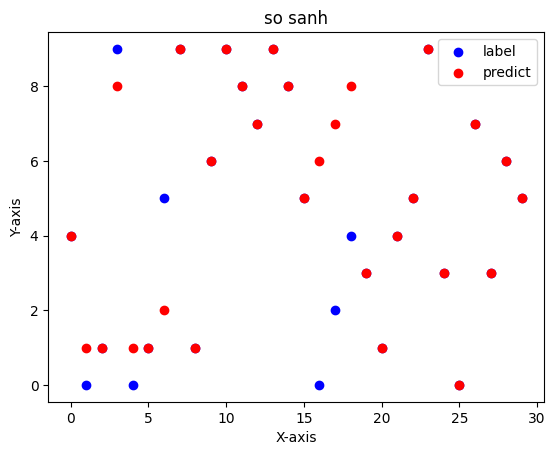

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(range(len(abc[0:30])),abc[0:30], label='label', color='blue')
plt.scatter(range(len(xyz[0:30])),xyz[0:30], label='predict', color='red')

# Đặt tên cho các trục và đồ thị
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('so sanh')

# Hiển thị chú thích
plt.legend()

# Hiển thị đồ thị
plt.show()

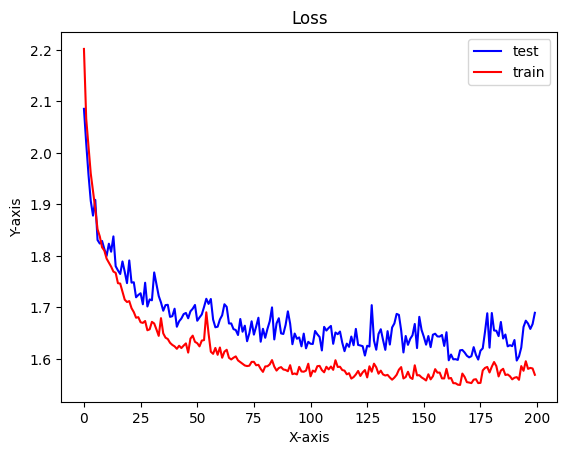

In [ ]:
import matplotlib.pyplot as plt

plt.plot(val_loss, label='test', color='blue')
plt.plot(train_loss, label='train', color='red')

# Đặt tên cho các trục và đồ thị
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Loss')

# Hiển thị chú thích
plt.legend()

# Hiển thị đồ thị
plt.show()

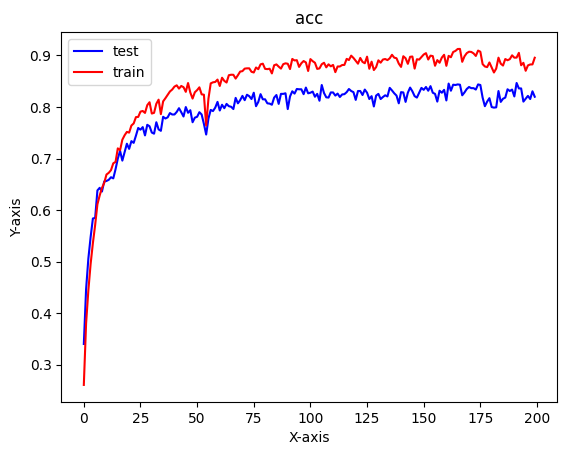

In [ ]:


plt.plot(val_acc, label='test', color='blue')
plt.plot(train_acc, label='train', color='red')

# Đặt tên cho các trục và đồ thị
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('acc')

# Hiển thị chú thích
plt.legend()

# Hiển thị đồ thị
plt.show()